In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Disclaimer: These are all Lower Limb Injuries

In [26]:
playlist = pd.read_csv('../input/nfl-playing-surface-analytics/PlayList.csv')
inj = pd.read_csv('../input/nfl-playing-surface-analytics/InjuryRecord.csv')
trk = pd.read_csv('../input/nfl-playing-surface-analytics/PlayerTrackData.csv')

In [27]:
outdoor = ['Outdoor', 'Outdoors', 'Cloudy', 'Heinz Field', 
           'Outdor', 'Ourdoor', 'Outside', 'Outddors', 
           'Outdoor Retr Roof-Open', 'Oudoor', 'Bowl']
indoor_closed = ['Indoors', 'Indoor', 'Indoor, Roof Closed', 'Indoor, Roof Closed',
                 'Retractable Roof', 'Retr. Roof-Closed', 'Retr. Roof - Closed', 'Retr. Roof Closed']
indoor_open = ['Indoor, Open Roof', 'Open', 'Retr. Roof-Open', 'Retr. Roof - Open']
dome_closed = ['Dome', 'Domed, closed', 'Closed Dome', 'Domed', 'Dome, closed']
dome_open = ['Domed, Open', 'Domed, open']

def convert_stadiums(x):
    if x in outdoor:
        return "outdoor"
    elif x in indoor_closed:
        return "indoor closed"
    elif x in indoor_open:
        return "indoor open"
    elif x in dome_closed:
        return "dome closed"
    elif x in dome_open:
        return "dome open"
    else:
        return "unknown"

playlist['StadiumType'] = playlist['StadiumType'].apply(convert_stadiums)
print(playlist.head())

   PlayerKey   GameID    PlayKey RosterPosition  PlayerDay  PlayerGame  \
0      26624  26624-1  26624-1-1    Quarterback          1           1   
1      26624  26624-1  26624-1-2    Quarterback          1           1   
2      26624  26624-1  26624-1-3    Quarterback          1           1   
3      26624  26624-1  26624-1-4    Quarterback          1           1   
4      26624  26624-1  26624-1-5    Quarterback          1           1   

  StadiumType  FieldType  Temperature         Weather PlayType  \
0     outdoor  Synthetic           63  Clear and warm     Pass   
1     outdoor  Synthetic           63  Clear and warm     Pass   
2     outdoor  Synthetic           63  Clear and warm     Rush   
3     outdoor  Synthetic           63  Clear and warm     Rush   
4     outdoor  Synthetic           63  Clear and warm     Pass   

   PlayerGamePlay Position PositionGroup  
0               1       QB            QB  
1               2       QB            QB  
2               3       QB   

In [28]:
rain = ['30% Chance of Rain', 'Rainy', 'Rain Chance 40%', 'Showers', 
        'Cloudy, 50% change of rain', 'Rain likely, temps in low 40s.',
        'Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.',
        'Scattered Showers', 'Cloudy, Rain', 'Rain shower', 'Light Rain', 'Rain']
overcast = ['Party Cloudy', 'Cloudy, chance of rain', 'Coudy', 'Cloudy and cold', 
            'Cloudy, fog started developing in 2nd quarter', 'Partly Clouidy', 
            'Mostly Coudy', 'Cloudy and Cool', 'cloudy', 'Partly cloudy', 'Overcast', 
            'Hazy', 'Mostly cloudy', 'Mostly Cloudy', 'Partly Cloudy', 'Cloudy']
clear = ['Partly clear', 'Sunny and clear', 'Sun & clouds', 'Clear and Sunny', 
         'Sunny and cold', 'Sunny Skies', 'Clear and Cool', 'Clear and sunny', 
         'Sunny, highs to upper 80s', 'Mostly Sunny Skies', 'Cold', 'Clear and warm', 
         'Sunny and warm', 'Clear and cold', 'Mostly sunny', 'T: 51; H: 55; W: NW 10 mph', 
         'Clear Skies', 'Clear skies', 'Partly sunny', 'Fair', 'Partly Sunny', 
         'Mostly Sunny', 'Clear', 'Sunny']
snow = ['Cloudy, light snow accumulating 1-3"', 'Heavy lake effect snow', 'Snow']
none = ['N/A Indoor', 'Indoors', 'Indoor', 'N/A (Indoors)', 'Controlled Climate']

def convert_weather(x):
    if x in rain:
        return "rain"
    elif x in overcast:
        return "overcast"
    elif x in clear:
        return "clear"
    elif x in snow:
        return "snow"
    elif x in none:
        return "indoors"
    else:
        return "unknown"

playlist['Weather'] = playlist['Weather'].apply(convert_weather)

print(playlist.head())


   PlayerKey   GameID    PlayKey RosterPosition  PlayerDay  PlayerGame  \
0      26624  26624-1  26624-1-1    Quarterback          1           1   
1      26624  26624-1  26624-1-2    Quarterback          1           1   
2      26624  26624-1  26624-1-3    Quarterback          1           1   
3      26624  26624-1  26624-1-4    Quarterback          1           1   
4      26624  26624-1  26624-1-5    Quarterback          1           1   

  StadiumType  FieldType  Temperature Weather PlayType  PlayerGamePlay  \
0     outdoor  Synthetic           63   clear     Pass               1   
1     outdoor  Synthetic           63   clear     Pass               2   
2     outdoor  Synthetic           63   clear     Rush               3   
3     outdoor  Synthetic           63   clear     Rush               4   
4     outdoor  Synthetic           63   clear     Pass               5   

  Position PositionGroup  
0       QB            QB  
1       QB            QB  
2       QB            QB  
3 

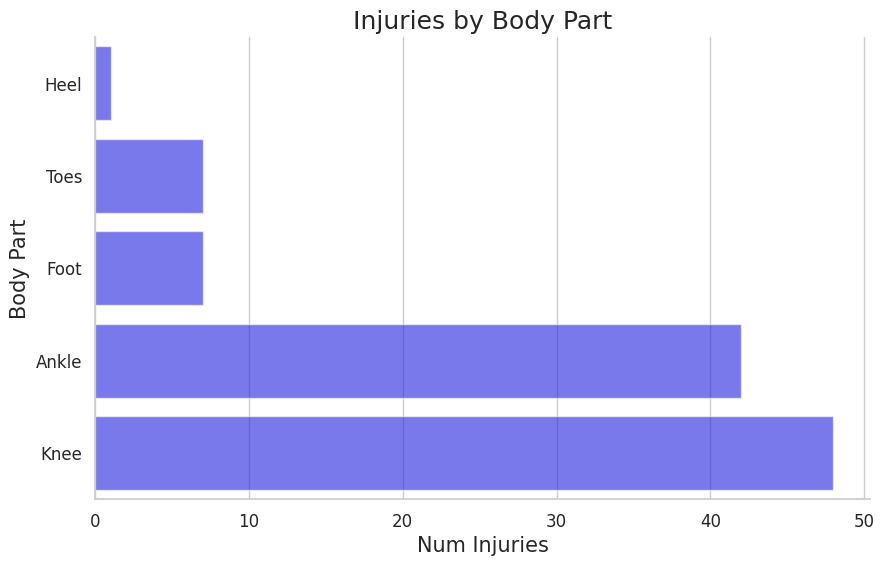

In [29]:
body_part_counts = inj['BodyPart'].value_counts().reset_index()
body_part_counts.columns = ['BodyPart', 'Count']

def theme():
    sns.set(style="whitegrid")
    plt.rc('axes', titlesize=18, labelsize=15)  # Title and axis labels
    plt.rc('xtick', labelsize=12)  # X-tick labels
    plt.rc('ytick', labelsize=12)  # Y-tick labels
    plt.rc('legend', fontsize=12)  # Legend labels
    plt.rc('font', size=12)  # General font size
    plt.rc('axes.spines', top=False, right=False)  # No top/right spines
theme()

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='BodyPart', data=body_part_counts, palette=['blue'], alpha=0.6)
plt.xlabel('Num Injuries')
plt.ylabel('Body Part')
plt.title('Injuries by Body Part', fontsize=18)
plt.gca().invert_yaxis() 
plt.show()


# Visualising Trends in Injury v RosterPosition, StadiumType, FieldType, Temperature, Weather

In [30]:
a = playlist[(playlist['RosterPosition'].notna()) & (playlist['RosterPosition'] != "Missing Data")][['PlayerKey', 'RosterPosition']].drop_duplicates()

injury_record = inj.merge(a, on='PlayerKey', how='left')
injury_record = injury_record.drop_duplicates(subset=['PlayKey', 'GameID', 'BodyPart'])

game_vars = playlist[['GameID', 'StadiumType', 'FieldType', 'Temperature', 'Weather']].drop_duplicates()
injury_record = injury_record.merge(game_vars, on='GameID', how='left')

play_vars = playlist[['PlayKey', 'PlayerDay', 'PlayerGame', 'PlayType', 'PlayerGamePlay']].drop_duplicates()
injury_record = injury_record.merge(play_vars, on='PlayKey', how='left')

injury_record['PlayerGame'] = np.where(
    injury_record['PlayerGame'].isna(),
    injury_record['GameID'].str.extract(r'(\d+)$').astype(int),
    injury_record['PlayerGame']
)

print(injury_record.head())

   PlayerKey   GameID     PlayKey BodyPart    Surface  DM_M1  DM_M7  DM_M28  \
0      39873  39873-4  39873-4-32     Knee  Synthetic      1      1       1   
1      46074  46074-7  46074-7-26     Knee    Natural      1      1       0   
2      36557  36557-1  36557-1-70    Ankle  Synthetic      1      1       1   
3      46646  46646-3  46646-3-30    Ankle    Natural      1      0       0   
4      43532  43532-5  43532-5-69    Ankle  Synthetic      1      1       1   

   DM_M42 RosterPosition    StadiumType  FieldType  Temperature   Weather  \
0       1     Linebacker  indoor closed  Synthetic           84  overcast   
1       0     Linebacker    indoor open    Natural           76  overcast   
2       1         Safety        outdoor  Synthetic           63     clear   
3       0     Linebacker        outdoor    Natural           80  overcast   
4       1  Wide Receiver  indoor closed  Synthetic           89  overcast   

   PlayerDay  PlayerGame PlayType  PlayerGamePlay  
0       29

In [31]:
player_counts = playlist.drop_duplicates(subset=['PlayerKey'])['RosterPosition'].value_counts()
print("Player Counts by Roster Position:")
for position, count in player_counts.items():
    print(f"{position}: {count}")


Player Counts by Roster Position:
Linebacker: 47
Wide Receiver: 41
Offensive Lineman: 33
Safety: 32
Defensive Lineman: 30
Cornerback: 27
Running Back: 23
Tight End: 9
Quarterback: 5
Kicker: 3


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


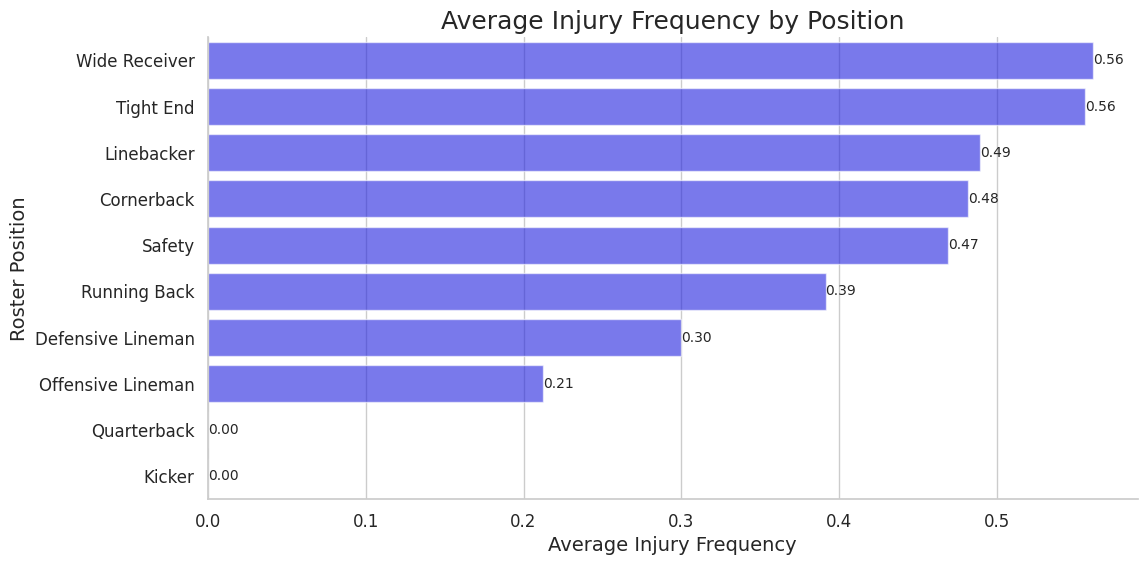

In [32]:

player_counts = {
    'Linebacker': 47,
    'Wide Receiver': 41,
    'Offensive Lineman': 33,
    'Safety': 32,
    'Defensive Lineman': 30,
    'Cornerback': 27,
    'Running Back': 23,
    'Tight End': 9,
    'Quarterback': 5,
    'Kicker': 3
}
injuries_by_position = {
    'Linebacker': 23,
    'Wide Receiver': 23,
    'Offensive Lineman': 7,
    'Safety': 15,
    'Defensive Lineman': 9,
    'Cornerback': 13,
    'Running Back': 9,
    'Tight End': 5,
    'Quarterback': 0,
    'Kicker': 0
}
ct = {position: injuries_by_position[position] / count for position, count in player_counts.items()}
ct = {k: v for k, v in sorted(ct.items(), key=lambda item: item[1], reverse=True)}
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=list(ct.values()), y=list(ct.keys()), palette=['blue'], alpha=0.6)
plt.title('Average Injury Frequency by Position', fontsize=18)
plt.xlabel('Average Injury Frequency', fontsize=14)
plt.ylabel('Roster Position', fontsize=14)
for index, value in enumerate(ct.values()):
    barplot.text(value, index, '{:.2f}'.format(value), ha='left', va='center', fontsize=10)
plt.show()


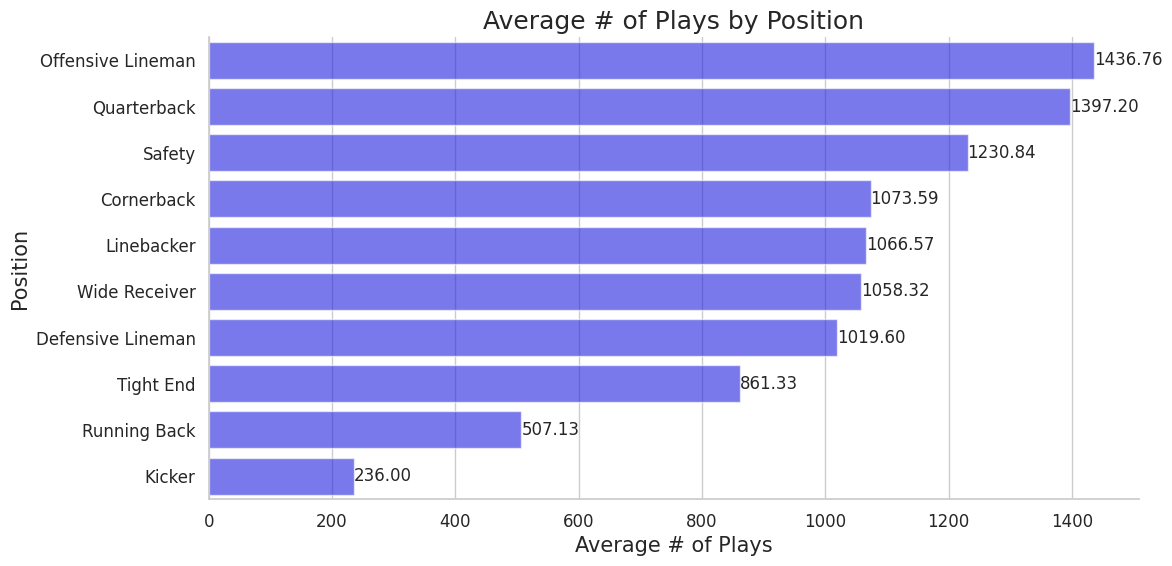

In [33]:
pos_avg = playlist.groupby('RosterPosition')['PlayKey'].size().div(playlist.groupby('RosterPosition')['PlayerKey'].nunique()).reset_index(name='Avg_Plays')
pos_avg = pos_avg.sort_values(by='Avg_Plays', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Avg_Plays', y='RosterPosition', data=pos_avg, palette=['blue'], alpha=0.6)
plt.title('Average # of Plays by Position', fontsize=18)
#('This is defined by total number of plays for the position in PlayList.csv / number of players assigned the position the set')
plt.xlabel('Average # of Plays')
plt.ylabel('Position')
for index, value in enumerate(pos_avg['Avg_Plays']):
    plt.text(value, index, '{:.2f}'.format(value), ha='left', va='center')
plt.show()

#Do another Hypothesis Test for Difference of Proportions (Injury Count/Average # of Plays)

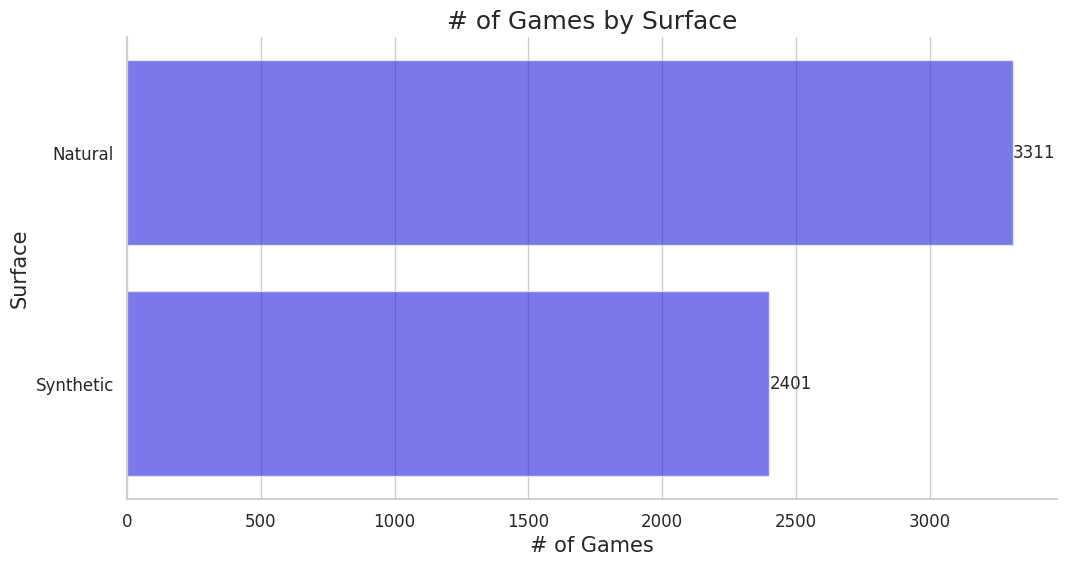

In [34]:
pos = playlist.groupby('FieldType')['GameID'].nunique().reset_index(name='Count')
pos = pos.sort_values(by='Count', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='FieldType', data=pos, palette=['blue'], alpha=0.6)
plt.title('# of Games by Surface', fontsize=18)
plt.xlabel('# of Games')
plt.ylabel('Surface')
for index, value in enumerate(pos['Count']):
    plt.text(value, index, str(value), ha='left', va='center')
plt.show()

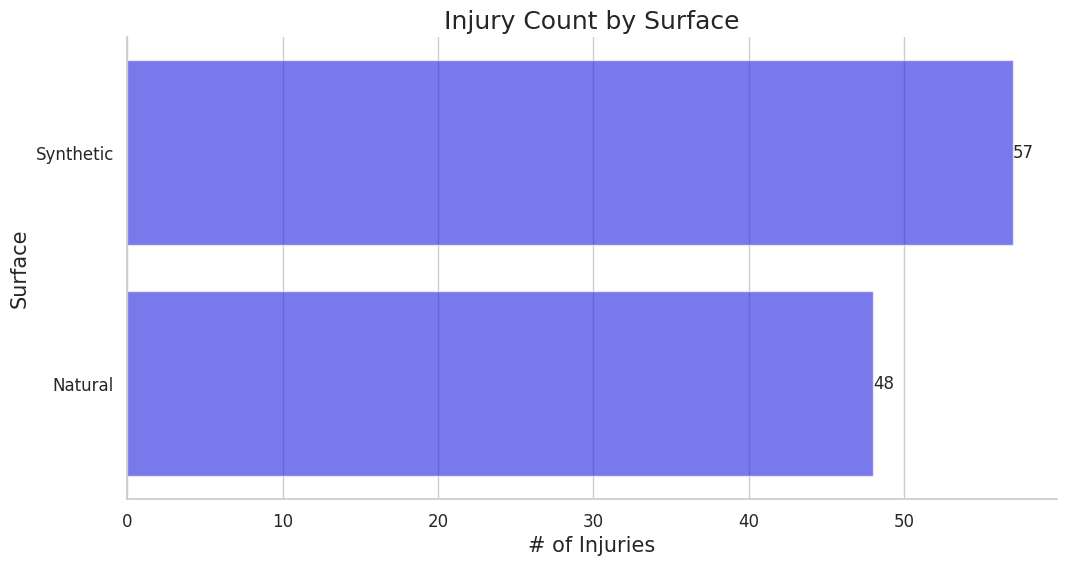

In [35]:
pos = injury_record.groupby('Surface').size().reset_index(name='Count')
pos = pos.sort_values(by='Count', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Surface', data=pos, palette=['blue'], alpha=0.6)
plt.title('Injury Count by Surface', fontsize=18)
plt.xlabel('# of Injuries')
plt.ylabel('Surface')
for index, value in enumerate(pos['Count']):
    plt.text(value, index, str(value), ha='left', va='center')
plt.show()

In [36]:
natural_games = 3311
synthetic_games = 2401

natural_injuries = 48
synthetic_injuries = 57

prop_of_injuries_nat = 48/3311
prop_of_inuries_synthetic = 57/2401

#Do a Hypothesis Test for Difference of Proportions

<Figure size 800x600 with 0 Axes>

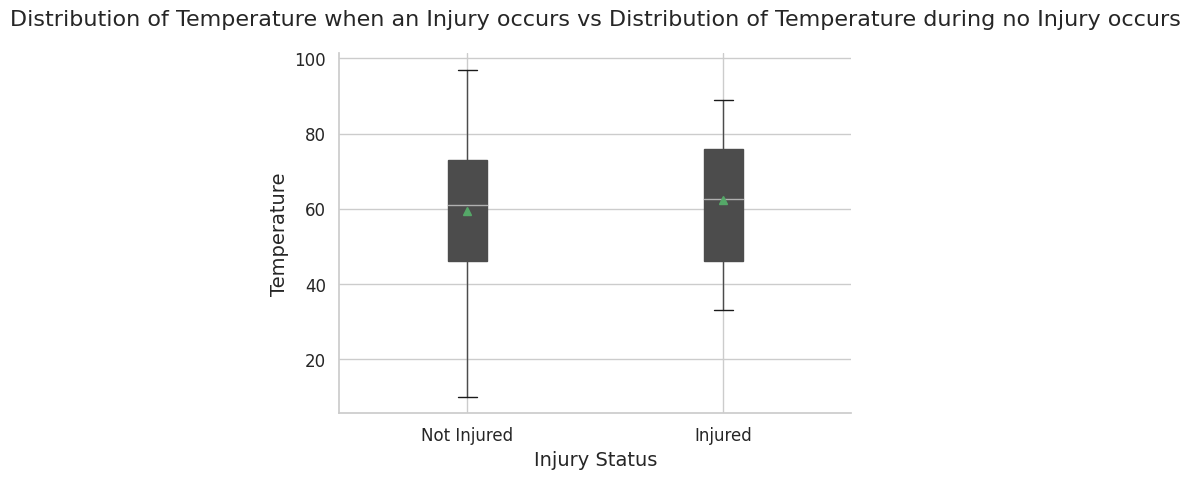

            count       mean        std   min   25%   50%   75%   max
IsInjured                                                            
False      3935.0  59.391614  17.734696  10.0  46.0  61.0  73.0  97.0
True         68.0  62.220588  16.787385  33.0  46.0  62.5  76.0  89.0


In [37]:
playlist['IsInjured'] = playlist['GameID'].isin(injury_record['GameID'])
filtered_list = playlist[(playlist['StadiumType'].isin(["dome_open", "indoor open", "outdoor"])) & (playlist['Temperature'] != -999)]
distinct_list = filtered_list[['GameID', 'Temperature', 'IsInjured']].drop_duplicates()
plt.figure(figsize=(8, 6))
boxplot = distinct_list.boxplot(column='Temperature', by='IsInjured', patch_artist=True, showmeans=True)
plt.title("Distribution of Temperature when an Injury occurs vs Distribution of Temperature during no Injury occurs", fontsize=16, pad=20)
plt.xlabel("Injury Status", fontsize=14)
plt.suptitle("")
plt.xticks([1, 2], ['Not Injured', 'Injured'])
plt.ylabel("Temperature", fontsize=14)
plt.show()
summary_stats = distinct_list.groupby('IsInjured')['Temperature'].describe()
print(summary_stats)

#Do a Difference of Means Test

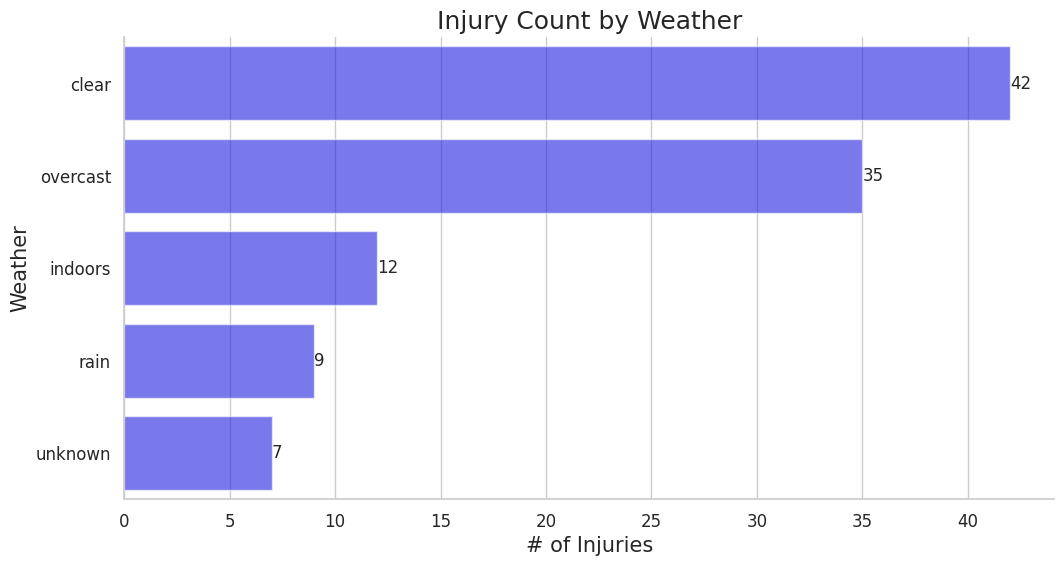

In [38]:
pos = injury_record.groupby('Weather').size().reset_index(name='Count')
pos = pos.sort_values(by='Count', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Weather', data=pos, palette=['blue'], alpha=0.6)
plt.title('Injury Count by Weather', fontsize=18)
plt.xlabel('# of Injuries')
plt.ylabel('Weather')
for index, value in enumerate(pos['Count']):
    plt.text(value, index, str(value), ha='left', va='center')
plt.show()


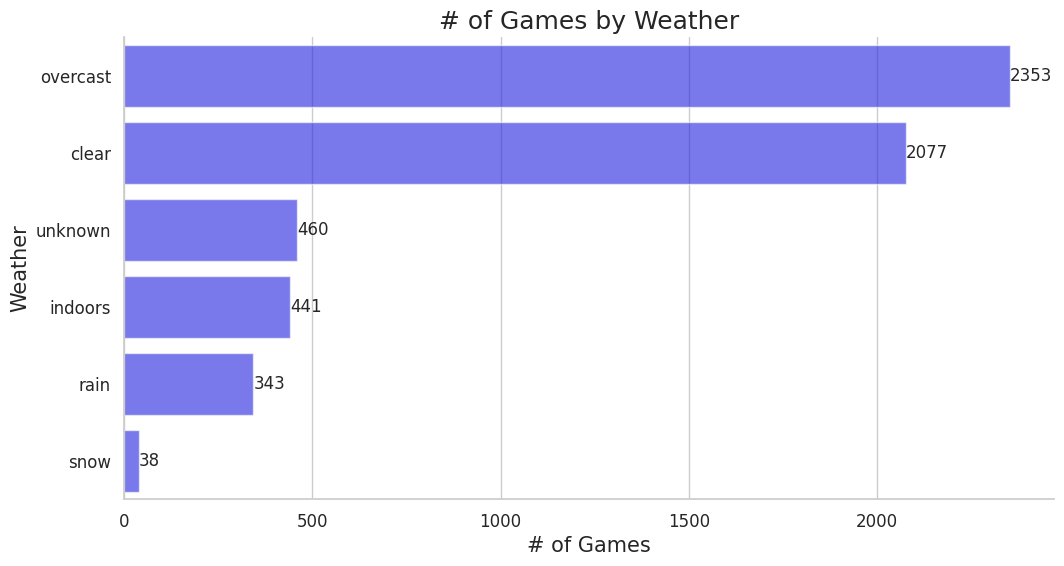

In [39]:
pos = playlist.groupby('Weather')['GameID'].nunique().reset_index(name='Count')
pos = pos.sort_values(by='Count', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Weather', data=pos, palette=['blue'], alpha=0.6)
plt.title('# of Games by Weather', fontsize=18)
plt.xlabel('# of Games')
plt.ylabel('Weather')
for index, value in enumerate(pos['Count']):
    plt.text(value, index, str(value), ha='left', va='center')
plt.show()

#Do a Hypothesis Test for difference of proportions

In [40]:
trk['isInjured'] = trk['PlayKey'].isin(injury_record['PlayKey'])

In [41]:
trk['event'] = trk['event'].replace('', pd.NA)
trk['event_clean'] = trk.groupby('PlayKey')['event'].ffill()

In [42]:
in_play = [
    "tackle", "ball_snap", "pass_outcome_incomplete", "out_of_bounds", "first_contact", 
    "handoff", "pass_forward", "pass_outcome_caught", "touchdown", "qb_sack", "touchback", 
    "kickoff", "punt", "pass_outcome_touchdown", "pass_arrived", "extra_point", "field_goal", 
    "play_action", "kick_received", "fair_catch", "punt_downed", "run", "punt_received", 
    "qb_kneel", "pass_outcome_interception", "field_goal_missed", "fumble", 
    "fumble_defense_recovered", "qb_spike", "extra_point_missed", "fumble_offense_recovered", 
    "pass_tipped", "lateral", "qb_strip_sack", "safety", "kickoff_land", "snap_direct", 
    "kick_recovered", "field_goal_blocked", "punt_muffed", "pass_shovel", 
    "extra_point_blocked", "pass_lateral", "punt_blocked", "run_pass_option", "free_kick", 
    "punt_fake", "end_path", "drop_kick", "field_goal_fake", "extra_point_fake", "xp_fake"
]

# Create variable to indicate whether the event is in_play or dead_ball
trk['play_stage'] = trk['event_clean'].apply(lambda x: 'in_play' if x in in_play else 'dead_ball')

In [43]:
player_tracking_in_play = trk[trk['play_stage'] == "in_play"]

# Group by PlayKey and calculate summary statistics
player_tracking_summary = player_tracking_in_play.groupby('PlayKey').agg(
    min_time=('time', 'min'),
    max_time=('time', 'max'),
    avg_speed=('s', 'mean'),
    sd_speed=('s', 'std')
)

# Calculate play_time
player_tracking_summary['play_time'] = player_tracking_summary['max_time'] - player_tracking_summary['min_time']

# Reset index to make PlayKey a column instead of index
player_tracking_summary.reset_index(inplace=True)

# Merge with play_list to get additional metadata
player_tracking_summary = pd.merge(player_tracking_summary, playlist, on='PlayKey', how='left')

print(player_tracking_summary)


           PlayKey  min_time  max_time  avg_speed  sd_speed  play_time  \
0        26624-1-1      16.2      29.8   0.882117  0.665748       13.6   
1       26624-1-10      14.8      27.5   0.927109  0.743211       12.7   
2       26624-1-11      17.4      36.8   1.286615  0.680290       19.4   
3       26624-1-12      22.3      35.6   0.723507  0.461557       13.3   
4       26624-1-13      16.8      25.5   0.817614  0.422028        8.7   
...            ...       ...       ...        ...       ...        ...   
266940  47888-9-54       5.5      22.6   2.508895  1.150119       17.1   
266941   47888-9-6      19.7      38.6   3.177737  1.949264       18.9   
266942   47888-9-7      12.8      33.3   2.136408  2.178288       20.5   
266943   47888-9-8      20.1      31.0   2.871545  1.944883       10.9   
266944   47888-9-9      17.3      33.4   1.766605  1.338069       16.1   

        PlayerKey   GameID RosterPosition  PlayerDay  PlayerGame StadiumType  \
0           26624  26624-1    Q

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


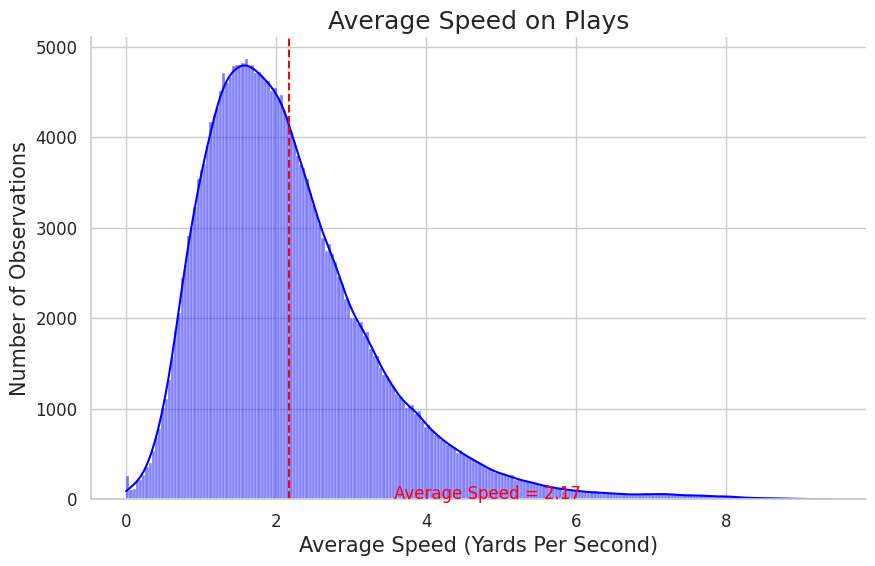

In [44]:
import matplotlib.pyplot as plt

# Assuming 'player_tracking_summary' DataFrame is already created and contains the necessary data

# Plotting
plt.figure(figsize=(10, 6))

# Density plot
sns.histplot(player_tracking_summary['avg_speed'], kde=True, alpha=0.5, color='blue')

# Vertical line for mean
plt.axvline(x=player_tracking_summary['avg_speed'].mean(), linestyle='--', color='red')

# Annotation for mean
plt.text(player_tracking_summary['avg_speed'].mean() + 1.4, 0.4, 
         f"Average Speed = {round(player_tracking_summary['avg_speed'].mean(), 2)}",
         fontsize=12, color='red')

# Labels and title
plt.xlabel('Average Speed (Yards Per Second)')
plt.ylabel('Number of Observations')
plt.title('Average Speed on Plays')

plt.show()


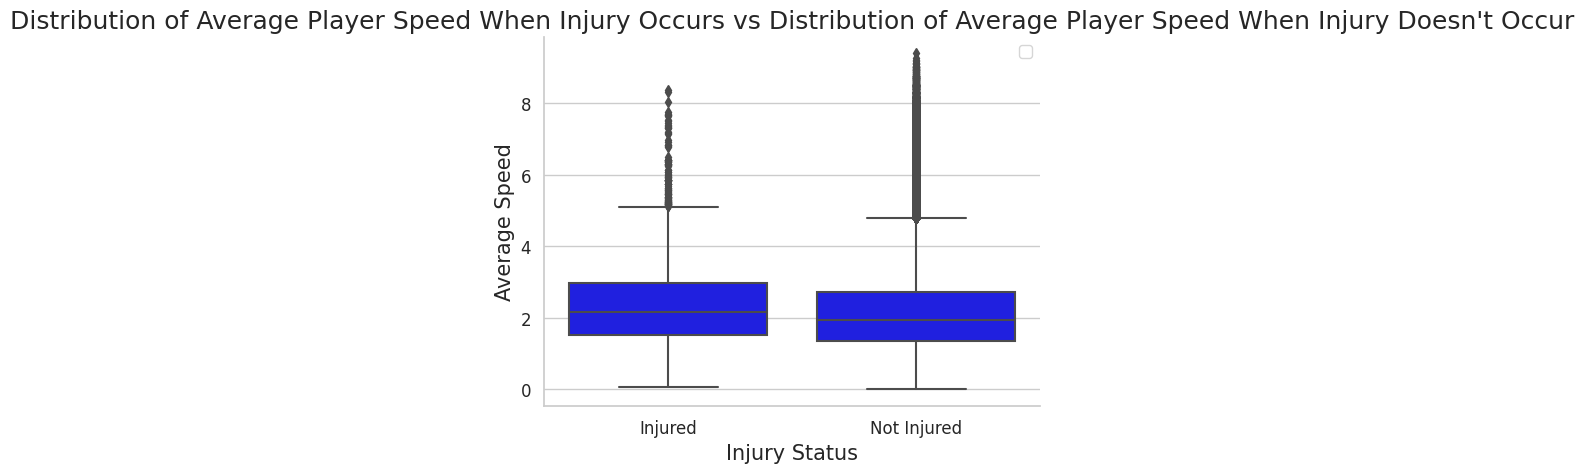

              count      mean       std       min       25%       50%  \
IsInjured                                                               
False      263560.0  2.165043  1.161362  0.000000  1.349894  1.951353   
True         3385.0  2.375467  1.185366  0.057778  1.535213  2.169127   

                75%       max  
IsInjured                      
False      2.724705  9.396129  
True       2.968810  8.373085  


In [58]:
sns.boxplot(data=player_tracking_summary,
            x='IsInjured', y='avg_speed',
            palette=['blue'], linewidth=1.5)
plt.xlabel("Injury Status")
plt.ylabel("Average Speed")
plt.title("Distribution of Average Player Speed When Injury Occurs vs Distribution of Average Player Speed When Injury Doesn't Occur")
plt.legend(loc='best', title=None)
plt.xticks([0, 1], ['Not Injured', 'Injured'])  
plt.gca().invert_xaxis()  
plt.show()
summary_stats = player_tracking_summary.groupby('IsInjured')['avg_speed'].describe()
print(summary_stats)